In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

C:\Users\klysm\AppData\Local\Temp\ipykernel_26688\1567141378.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataframe = pd.read_csv("SINES.csv") 

In [3]:
#contar valores nulos ou zero na coluna Imo do dataframe
print(dataframe['Imo'].isnull().sum())
#contar valores = 0 na coluna Imo do dataframe
print(len(dataframe[dataframe['Imo'] == 0]))

0
1750


In [5]:
dataframe

,Dock Timestamp,Undock Timestamp,Vessel Name,Berth Name,Terminal Name,Current Port,Current Port Ata,Destination Port,Load Condition At Arrival,Current Port Atd,...,Capacity - Teu,Capacity - Liquid Gas,Voyage Distance Travelled,Voyage Speed Average,Voyage Speed Max,Voyage Idle Time,Voyage Origin Port Atd,Voyage Origin Port,Voyage Time Underway,Draught At Departure
0,2024-04-03 22:19:00,NaN,CASTELO DE SAO JORGE,3,Multi Purpose Terminal,SINES,2024-04-03 06:26:00,NaN,NaN,NaN,...,NaN,NaN,4.0,5.1,6.7,0.0,2024-04-03 06:25:00,SINES ANCH,0.0,NaN
1,2024-04-03 21:36:00,2024-04-03 22:03:00,CASTELO DE SAO JORGE,3,Oil and Products Terminal,SINES,2024-04-03 06:26:00,NaN,NaN,NaN,...,NaN,NaN,4.0,5.1,6.7,0.0,2024-04-03 06:25:00,SINES ANCH,0.0,NaN
2,2024-04-03 21:32:00,2024-04-03 22:08:00,CTE CELSO MADEIRA,3,Oil and Products Terminal,SINES,2024-04-03 19:28:00,NaN,NaN,NaN,...,NaN,NaN,6.0,14.8,17.4,0.0,2024-04-03 19:06:00,SINES,0.4,NaN
3,2024-04-03 19:53:00,NaN,VB LUSITANIA,Container,Container Terminal XXI,SINES,2024-04-03 19:33:00,NaN,NaN,NaN,...,NaN,NaN,4.0,7.3,9.3,0.0,2024-04-03 19:04:00,SINES,0.5,NaN
4,2024-04-03 19:49:00,2024-04-03 20:40:00,SR36,2,Multi Purpose Terminal,SINES,2024-04-03 18:50:00,NaN,NaN,NaN,...,NaN,NaN,15.0,19.6,32.7,0.1,2024-04-03 17:56:00,SINES,0.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2023-11-05 20:07:00,2023-11-06 07:49:00,POSEIDON,3,Multi Purpose Terminal,SINES,2023-11-02 03:20:00,SINES,NaN,2023-11-06 08:08:00,...,NaN,NaN,3.0,8.1,9.9,0.0,2023-11-02 03:00:00,SINES,0.3,0.0
3996,2023-11-05 08:10:00,2023-11-05 19:38:00,POSEIDON,3,Multi Purpose Terminal,SINES,2023-11-02 03:20:00,NaN,NaN,2023-11-06 08:08:00,...,NaN,NaN,3.0,8.1,9.9,0.0,2023-11-02 03:00:00,SINES,0.3,0.0
3997,2023-11-04 20:03:00,2023-11-05 07:52:00,POSEIDON,3,Multi Purpose Terminal,SINES,2023-11-02 03:20:00,NaN,NaN,2023-11-06 08:08:00,...,NaN,NaN,3.0,8.1,9.9,0.0,2023-11-02 03:00:00,SINES,0.3,0.0
3998,2023-11-04 19:09:00,2023-11-04 19:14:00,POSEIDON,3,Multi Purpose Terminal,SINES,2023-11-02 03:20:00,NaN,NaN,2023-11-06 08:08:00,...,NaN,NaN,3.0,8.1,9.9,0.0,2023-11-02 03:00:00,SINES,0.3,0.0


In [4]:
df_modelagem = dataframe[['Berth Name', 'Terminal Name', 'Time At Berth', 'Time At Port' , 'Vessel Type - Generic', 'Commercial Market','Voyage Distance Travelled', 'Voyage Speed Average', 'Imo', 'Voyage Origin Port']]

In [5]:
profile = ProfileReport(df_modelagem, title="Profiling Report filtro colunas")
profile_all = ProfileReport(dataframe, title="Profiling all data", explorative=True)

In [6]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#remover linhas onde Voyage Speed Average, Time At Port e Time At Berth que são nulos
df_modelagem = df_modelagem.dropna(subset=['Time At Port'])
df_modelagem = df_modelagem.dropna(subset=['Time At Berth'])
df_modelagem = df_modelagem.dropna(subset=['Voyage Speed Average'])


In [8]:
#Remover linhas onde Imo é igual a 0
df_modelagem = df_modelagem[df_modelagem['Imo'] != 0]

In [9]:
#Verificar se existem valores nulos no dataframe
print(df_modelagem.isnull().sum())


Berth Name                   0
Terminal Name                0
Time At Berth                0
Time At Port                 0
Vessel Type - Generic        0
Commercial Market            0
Voyage Distance Travelled    0
Voyage Speed Average         0
Imo                          0
Voyage Origin Port           0
dtype: int64


In [10]:
df_modelagem.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 9 to 3999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 2212 non-null   object 
 1   Terminal Name              2212 non-null   object 
 2   Time At Berth              2212 non-null   float64
 3   Time At Port               2212 non-null   float64
 4   Vessel Type - Generic      2212 non-null   object 
 5   Commercial Market          2212 non-null   object 
 6   Voyage Distance Travelled  2212 non-null   float64
 7   Voyage Speed Average       2212 non-null   float64
 8   Imo                        2212 non-null   int64  
 9   Voyage Origin Port         2212 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 190.1+ KB


In [11]:
#exportar o df_modelagem para um arquivo csv
df_modelagem.to_csv('dataset_navios_with_imos.csv', index=False)

In [12]:
#remover coluna Imo
df_modelagem = df_modelagem.drop(columns=['Imo'])

In [13]:
from sklearn.preprocessing import LabelEncoder

df_modelagem = df_modelagem.copy()

# Encode the categorical variables
categorical_cols = ['Berth Name', 'Terminal Name', 'Vessel Type - Generic', 'Commercial Market', 'Voyage Origin Port']
for col in categorical_cols:
    df_modelagem[col] = LabelEncoder().fit_transform(df_modelagem[col])

In [14]:
df_modelagem.head()

,Berth Name,Terminal Name,Time At Berth,Time At Port,Vessel Type - Generic,Commercial Market,Voyage Distance Travelled,Voyage Speed Average,Voyage Origin Port
9,11,0,6.5,6.8,17,6,4.0,6.9,118
16,11,0,7.2,7.6,17,6,3.0,6.6,118
17,11,0,14.5,15.0,3,0,1208.0,15.9,6
18,11,0,7.2,7.6,17,6,2.0,6.4,118
20,9,2,18.9,19.2,11,4,27.0,4.8,72


In [15]:
from sklearn.model_selection import train_test_split

X = df_modelagem.drop('Time At Berth', axis=1)
y = df_modelagem['Time At Berth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Readom Forest MODEL

In [16]:
#modelo de reandom forest refressor para prever o tempo de atracação
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_rf = RandomForestRegressor(n_estimators=50, random_state=12)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)


In [17]:
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

#R quadrado
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_rf)
print(f'R^2: {r2}')

Mean Squared Error: 51.25128154435683
R^2: 0.8801469111518682


In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')
print(f"R² (Linear Regression): {r2_lr}")


Mean Squared Error: 247.31387755758576
R² (Linear Regression): 0.42164700575084313


C:\Users\klysm\AppData\Local\Temp\ipykernel_15704\923317119.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
c:\Users\klysm\miniconda3\envs\ips_cienciadedados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


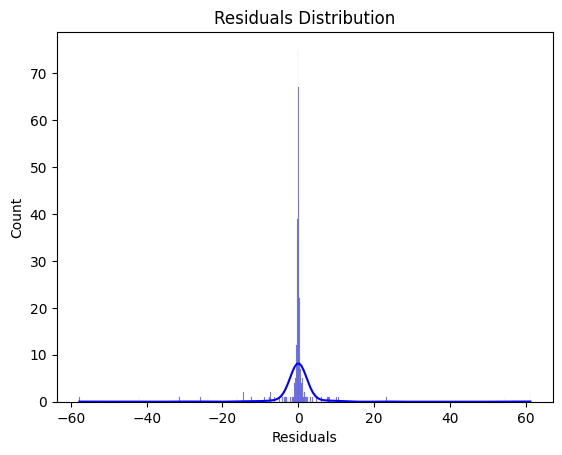

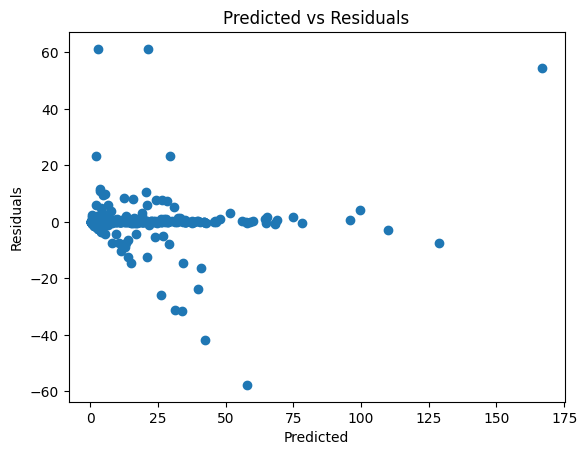

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()


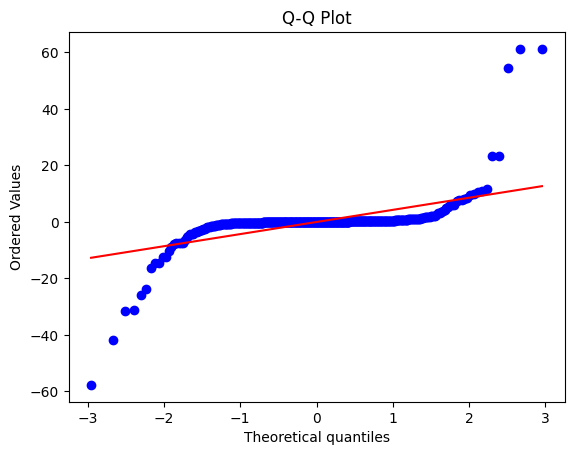

In [34]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


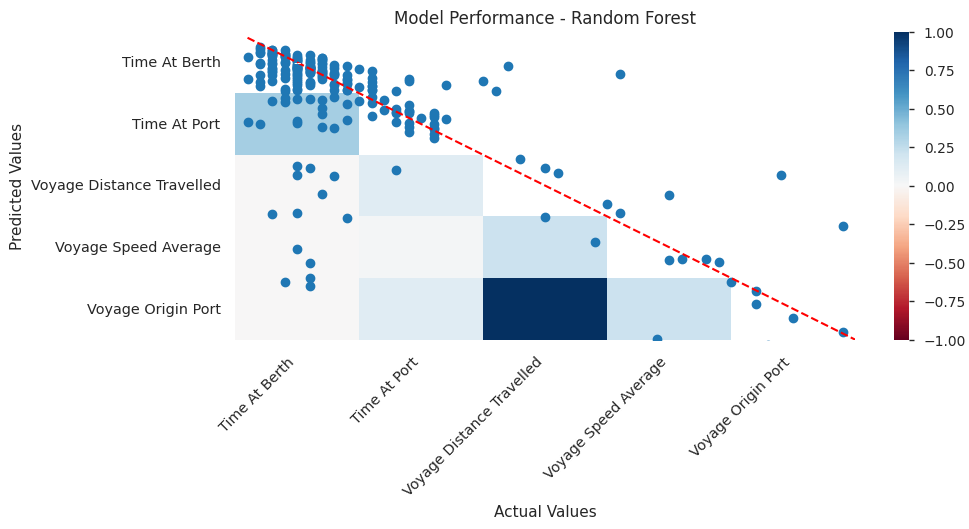

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred_rf)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Performance - Random Forest')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Show the plot
plt.show()

## XGBoost MODEL

In [19]:
from xgboost import XGBRegressor

model_xg = XGBRegressor(objective='reg:squarederror', random_state=42)
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
y_pred_xb = model_xg.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_xb)
r2 = r2_score(y_test, y_pred_xb)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 51.44
R-squared: 0.88


## MLP MODEL

In [22]:
from sklearn.neural_network import MLPRegressor

# Create the MLP model
model_mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', random_state=24, max_iter=1000)

# Train the MLP model
model_mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=24)

In [23]:
y_pred_mlp = model_mlp.predict(X_test)

# Calculate model performance
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP Mean Squared Error: {mse_mlp:.2f}')
print(f'MLP R-squared: {r2_mlp:.2f}')

MLP Mean Squared Error: 346.33
MLP R-squared: 0.19


## Métricas

In [24]:
def verificar_valores_reais(y_test, y_pred):    
    comparison_df = pd.DataFrame({
        'True Value': y_test,
        'Predicted Value': y_pred,

    })

    # Display the first few rows of the DataFrame
    print(comparison_df.head(20))

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print("Mean Squared Error (MSE): ", mse)
    print("Root Mean Squared Error (RMSE): ", rmse)
    print("R-squared (R2 Score): ", r2)

In [26]:
verificar_valores_reais(y_test, y_pred_rf)
print("\n")
model_performance(y_test, y_pred_rf)

      True Value  Predicted Value
1495        23.3        23.470000
2265        19.4        19.414000
2585         0.6         0.650000
783          0.5         3.530667
2190         0.4         1.078000
2468         0.6         0.586633
1430         0.9         0.696400
744          8.0         2.006000
1939         0.8         0.688000
3970        23.6        15.578000
2483         0.5         0.578000
1261         5.0         9.298000
2123         0.7         0.620000
2690        18.6        18.764000
1390        19.6        34.050000
709         15.4         5.384000
2145         0.5         0.420000
777          0.2         0.256000
376         18.2        17.026000
3672        56.6        56.130000


Mean Squared Error (MSE):  51.25128154435683
Root Mean Squared Error (RMSE):  7.159000038019055
R-squared (R2 Score):  0.8801469111518682


In [27]:
verificar_valores_reais(y_test, y_pred_xb)
print("\n")
model_performance(y_test, y_pred_xb)

      True Value  Predicted Value
1495        23.3        23.717701
2265        19.4        17.637192
2585         0.6         0.602902
783          0.5         6.516016
2190         0.4         0.767905
2468         0.6         0.573542
1430         0.9         0.956872
744          8.0         4.826123
1939         0.8         0.390408
3970        23.6        14.136678
2483         0.5         0.507887
1261         5.0         5.688244
2123         0.7         0.711697
2690        18.6        18.521811
1390        19.6        34.580086
709         15.4         1.450486
2145         0.5         0.564974
777          0.2         0.333778
376         18.2        18.276833
3672        56.6        55.953083


Mean Squared Error (MSE):  51.44004121454509
Root Mean Squared Error (RMSE):  7.172171304043504
R-squared (R2 Score):  0.8797054894187855


In [28]:
verificar_valores_reais(y_test, y_pred_mlp)
print("\n")
model_performance(y_test, y_pred_mlp)

      True Value  Predicted Value
1495        23.3        23.827793
2265        19.4        19.901823
2585         0.6        -1.223773
783          0.5         5.860113
2190         0.4         5.391275
2468         0.6         1.071609
1430         0.9         5.287965
744          8.0         7.277387
1939         0.8         1.007578
3970        23.6        24.570739
2483         0.5         1.339239
1261         5.0         8.811834
2123         0.7         2.211931
2690        18.6        18.418547
1390        19.6        16.016648
709         15.4        17.446401
2145         0.5         0.725174
777          0.2         1.409620
376         18.2        17.377991
3672        56.6        57.884829


Mean Squared Error (MSE):  346.33416474210986
Root Mean Squared Error (RMSE):  18.610055473912748
R-squared (R2 Score):  0.19008426390168753


In [29]:
#https://blog.dailydoseofds.com/p/statsmodel-regression-summary-will

import statsmodels.formula.api as smf
statsmodels = smf.ols('y ~ X', data=df_modelagem)
statsmodels = statsmodels.fit()
print(statsmodels.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.25e-266
Time:                        00:52:54   Log-Likelihood:                -9182.2
No. Observations:                2212   AIC:                         1.838e+04
Df Residuals:                    2203   BIC:                         1.843e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.5029      2.711      7.563      0.0